In [15]:
# 1.读取数据
import pandas
df = pandas.read_excel('data/IT行业收入表.xlsx')
df.head()

,工龄,薪水
0,0.0,10808
1,0.1,13611
2,0.2,12306
3,0.3,12151
4,0.3,13057


In [16]:
# 此时的工龄为自变量，薪水为因变量，通过如下代码进行自变量、因变量选取
X = df[['工龄']]
Y = df['薪水']

In [17]:
# 2.模型训练
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression()

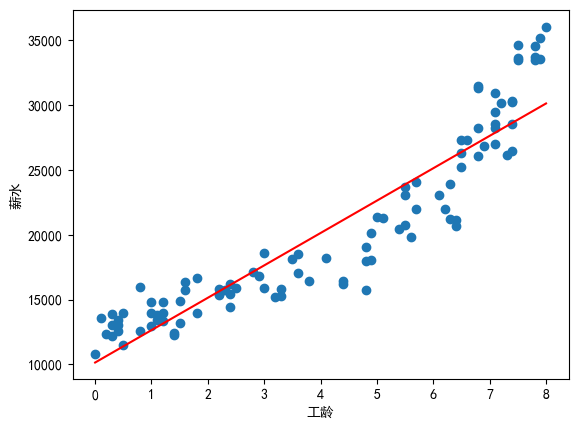

In [18]:
# 3.模型可视化
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.scatter(X,Y)
plt.plot(X, regr.predict(X), color='red')  # color='red'设置为红色
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

In [19]:
# 4.线性回归方程构造
print('系数a为:' + str(regr.coef_[0]))
print('截距b为:' + str(regr.intercept_))

系数a为:2497.151347604688
截距b为:10143.131966873781


In [20]:
#评价结果
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
est.summary()  # 在非Jupyter Notebook的编辑器中需要写成print(est.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     薪水   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     578.5
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           6.69e-43
Time:                        10:27:54   Log-Likelihood:                -930.83
No. Observations:                 100   AIC:                             1866.
Df Residuals:                      98   BIC:                             1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.014e+04    507.633     19.981      0.000    9135.751    1.12e+04
工龄          2497.1513    103.823     24.052      0.000    2291.118    2703.185
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.463
Skew:                           0.007   Prob(JB):                        0.793
Kurtosis:                       2.667   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# 通过如下代码生成二次项数据：
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_ = poly_reg.fit_transform(X)
#将原有的X转为一个新的二维数组X_，该二维数组包含新生成的二次项数据（x^2）和原来一次项数据（x）。
# 模型训练
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression()

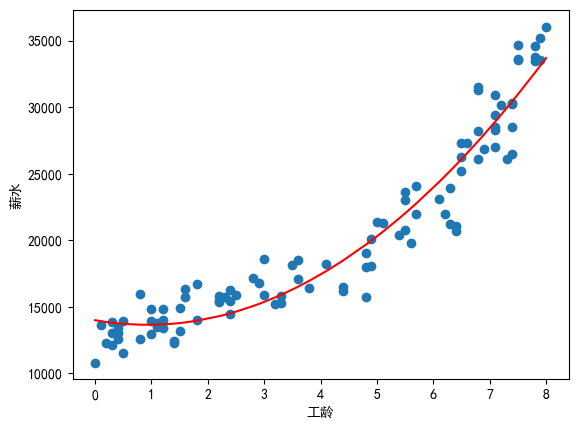

In [22]:
#可视化
plt.scatter(X,Y)
plt.plot(X, regr.predict(X_), color='red')  # color='red'设置为红色
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

In [23]:
# 打印系数和常数项
print(regr.coef_)  # 获取系数a, b 
print(regr.intercept_)  # 获取常数项c

[   0.         -743.68080444  400.80398224]
13988.159332096873


In [24]:
#评价结果
import statsmodels.api as sm
X2 = sm.add_constant(X_)  # 这里传入的是含有x^2的X_
est = sm.OLS(Y, X2).fit()
est.summary()  # 在非Jupyter Notebook的编辑器中需要写成print(est.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     薪水   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     654.8
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           4.70e-57
Time:                        10:27:54   Log-Likelihood:                -893.72
No. Observations:                 100   AIC:                             1793.
Df Residuals:                      97   BIC:                             1801.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.399e+04    512.264     27.307      0.000     1.3e+04     1.5e+04
x1          -743.6808    321.809     -2.311      0.023   -1382.383    -104.979
x2           400.8040     38.790     10.333      0.000     323.816     477.792
==============================================================================
Omnibus:                        2.440   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.083
Skew:                          -0.352   Prob(JB):                        0.353
Kurtosis:                       3.063   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# 1.读取数据
import pandas
df = pandas.read_excel('data/IT行业收入表.xlsx')
X = df[['工龄']]
Y = df['薪水']

# 2.模型训练
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, regr.predict(X))
print(r2)

0.8551365584870814
